In [1]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [13]:
sns.set_style('whitegrid')
df = pd.read_csv('rainfall_India.csv')
df = df[['SUBDIVISION', 'ANNUAL']]
df = df.groupby(by='SUBDIVISION').mean()
df

,ANNUAL
SUBDIVISION,
ANDAMAN & NICOBAR ISLANDS,2927.439423
ARUNACHAL PRADESH,3418.857143
ASSAM & MEGHALAYA,2580.695652
BIHAR,1197.633913
CHHATTISGARH,1371.728696
COASTAL ANDHRA PRADESH,1052.904348
COASTAL KARNATAKA,3408.409649
EAST MADHYA PRADESH,1205.000000
EAST RAJASTHAN,655.215652


<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

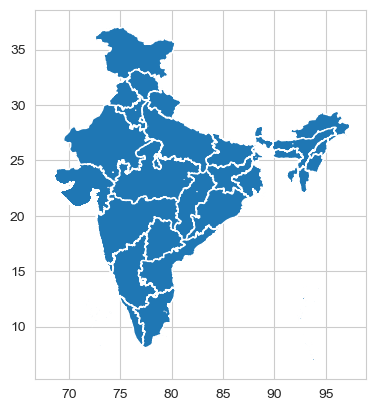

In [38]:
map_df = gpd.read_file('Indian_States.shp')
states_and_ut = map_df['st_nm'].tolist()
print(type(map_df))
map_df.plot()

In [39]:
state_name_mapping = {
    'Andaman & Nicobar Island': 'ANDAMAN & NICOBAR ISLANDS',
    'Arunanchal Pradesh': 'ARUNACHAL PRADESH',
    'Assam': 'ASSAM & MEGHALAYA',
    'Bihar': 'BIHAR',
    'Chandigarh': 'HARYANA DELHI & CHANDIGARH',
    'Chhattisgarh': 'CHHATTISGARH',
    'Dadara & Nagar Havelli': 'DADRA & NAGAR HAVELI',
    'Daman & Diu': 'DAMAN & DIU',
    'Goa': 'KONKAN & GOA',
    'Gujarat': 'GUJARAT REGION',
    'Haryana': 'HARYANA DELHI & CHANDIGARH',
    'Himachal Pradesh': 'HIMACHAL PRADESH',
    'Jammu & Kashmir': 'JAMMU & KASHMIR',
    'Jharkhand': 'JHARKHAND',
    'Karnataka': 'NORTH INTERIOR KARNATAKA',
    'Kerala': 'KERALA',
    'Lakshadweep': 'LAKSHADWEEP',
    'Madhya Pradesh': 'EAST MADHYA PRADESH',
    'Maharashtra': 'MADHYA MAHARASHTRA',
    'Manipur': 'NAGA MANI MIZO TRIPURA',
    'Meghalaya': 'ASSAM & MEGHALAYA',
    'Mizoram': 'NAGA MANI MIZO TRIPURA',
    'Nagaland': 'NAGA MANI MIZO TRIPURA',
    'NCT of Delhi': 'HARYANA DELHI & CHANDIGARH',
    'Puducherry': 'TAMIL NADU',
    'Punjab': 'PUNJAB',
    'Rajasthan': 'EAST RAJASTHAN',
    'Sikkim': 'SUB HIMALAYAN WEST BENGAL & SIKKIM',
    'Tamil Nadu': 'TAMIL NADU',
    'Telangana': 'TELANGANA',
    'Tripura': 'NAGA MANI MIZO TRIPURA',
    'Uttar Pradesh': 'EAST UTTAR PRADESH',
    'Uttarakhand': 'UTTARAKHAND',
    'West Bengal': 'GANGETIC WEST BENGAL',
    'Odisha': 'ORISSA',
    'Andhra Pradesh': 'COASTAL ANDHRA PRADESH'
}

In [40]:
map_df['st_nm'] = map_df['st_nm'].map(state_name_mapping)

In [47]:
map_df2 = map_df.copy(deep=True)
merged = map_df2.set_index('st_nm').join(df).dropna()
merged

,geometry,ANNUAL
st_nm,,
ANDAMAN & NICOBAR ISLANDS,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",2927.439423
ARUNACHAL PRADESH,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",3418.857143
ASSAM & MEGHALAYA,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2580.695652
ASSAM & MEGHALAYA,"POLYGON ((91.85632 26.10353, 91.86717 26.09906...",2580.695652
BIHAR,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",1197.633913
CHHATTISGARH,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",1371.728696
COASTAL ANDHRA PRADESH,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",1052.904348
EAST MADHYA PRADESH,"MULTIPOLYGON (((74.17932 22.39059, 74.17776 22...",1205.000000
EAST RAJASTHAN,"POLYGON ((73.89849 29.97896, 73.90021 29.97140...",655.215652


<Axes: title={'center': 'Rainfall in over the years 1901 to 2015'}>

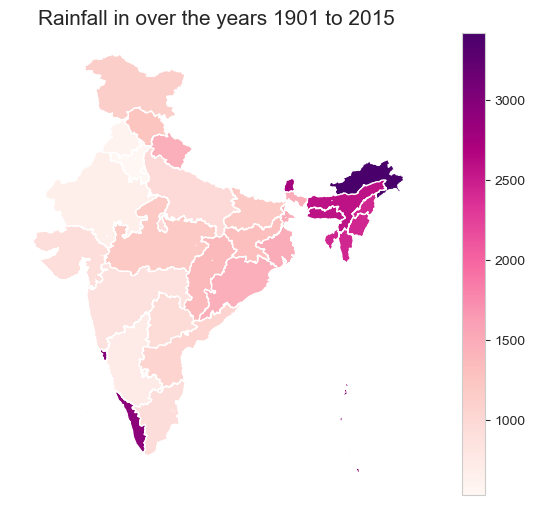

In [50]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Rainfall in over the years 1901 to 2015', fontdict={'fontsize': '15', 'fontweight' : '3'})
merged.plot(column='ANNUAL',
            cmap='RdPu',
            linewidth=0.9,
            ax=ax,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)

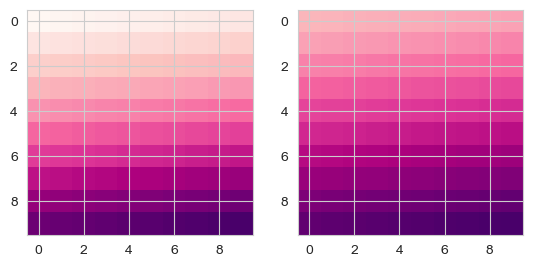

In [51]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)
cmap = plt.get_cmap('RdPu')
new_cmap = truncate_colormap(cmap, 0.3, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

<Axes: title={'center': 'Rainfall in over the years 1901 to 2015'}>

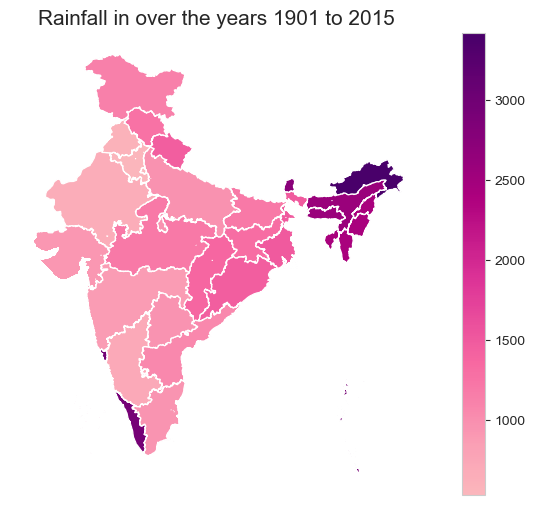

In [52]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Rainfall in over the years 1901 to 2015', fontdict={'fontsize': '15', 'fontweight' : '3'})
merged.plot(column='ANNUAL',
            cmap=new_cmap,
            linewidth=0.9,
            ax=ax,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)